# Regression Analysis

In [96]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [97]:
#506 data points and 13 dimensions

In [98]:
import pandas as pd

In [99]:
house_price = load_boston()
df=pd.DataFrame(house_price.data, columns = house_price.feature_names)
df['PRICE']=house_price.target

In [100]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Task 1: Splitting the dataset into training and test dataset and getting and plotting the OLS coefficients using bar graph

In [101]:
from sklearn.model_selection import train_test_split,KFold

In [102]:
xtr, xte, ytr, yte = train_test_split(house_price.data,df['PRICE'],test_size = 0.3, random_state=0)

In [103]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [104]:
reg = linear_model.LinearRegression(normalize=True)

In [105]:
reg.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [106]:
reg.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

#### Importing matplotlib and numpy for plotting

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<BarContainer object of 13 artists>

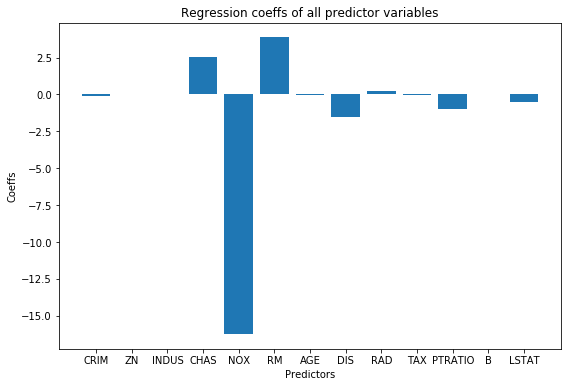

In [108]:
plt.figure(figsize=(9,6))
plt.title("Regression coeffs of all predictor variables")
plt.ylabel("Coeffs")
#plt.xlabel("Predictors")
plt.xlabel("Predictors")
plt.bar(house_price.feature_names, reg.coef_)
#plt.show()

# Task 2: Regression analysis using ridge regression

Plotting the regression coefficient estimates from ridge regression for given predictors: room, residential zone, highway access, crime rate, tax as λ(overfitting coeff) varies from 0-200.

In [109]:
room=[]
res_zone=[]
high_acc=[]
crime_rate=[]
tax=[]
lambd=[]
for i in range(200):
    lambd.append(i)
    rid= linear_model.Ridge(alpha=i, normalize=True)
    rid.fit(xtr,ytr)
    room.append(rid.coef_[5])
    res_zone.append(rid.coef_[1])
    high_acc.append(rid.coef_[8])
    crime_rate.append(rid.coef_[0])
    tax.append(rid.coef_[9])

Text(0.5, 0, 'Lambda')

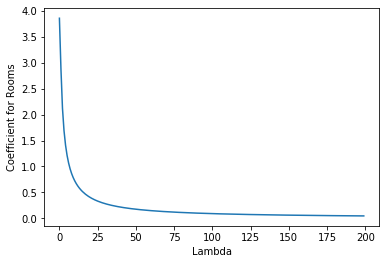

In [110]:
plt.plot(lambd, room)
plt.ylabel("Coefficient for Rooms")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

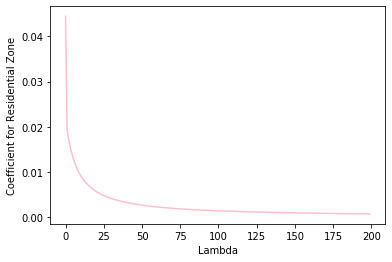

In [111]:
plt.plot(lambd,res_zone,color='pink')
plt.ylabel("Coefficient for Residential Zone")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

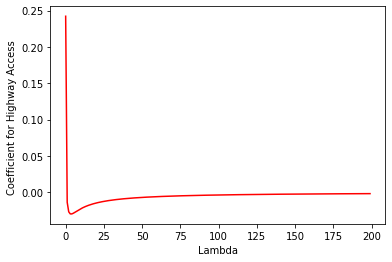

In [112]:
plt.plot(lambd,high_acc,color='red')
plt.ylabel("Coefficient for Highway Access ")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

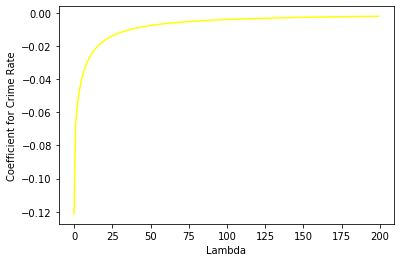

In [113]:
plt.plot(lambd,crime_rate,color='yellow')
plt.ylabel("Coefficient for Crime Rate")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

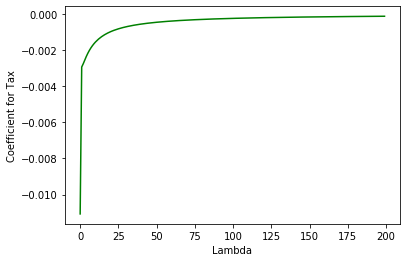

In [114]:
plt.plot(lambd,tax,color='green')
plt.ylabel("Coefficient for Tax")
plt.xlabel("Lambda")

# Task 3: Regression analysis using lasso regression

Plotting the regression coefficient estimates from lasso regression for given predictors: room, residential zone, highway access, crime rate, tax as λ(overfitting coeff) varies from 0-200.

In [115]:
room=[]
residential_zone=[]
highway_access=[]
crime_rate=[]
tax=[]
alpha=[]


for i in range(1,200):                  
  alpha.append(i)                             
  lasso=linear_model.Lasso(alpha=i)
  lasso.fit(xtr,ytr)
  crime_rate.append(lasso.coef_[0])
  room.append(lasso.coef_[5])
  residential_zone.append(lasso.coef_[1])
  highway_access.append(lasso.coef_[8])
  tax.append(lasso.coef_[9])

Text(0.5, 0, 'Lambda')

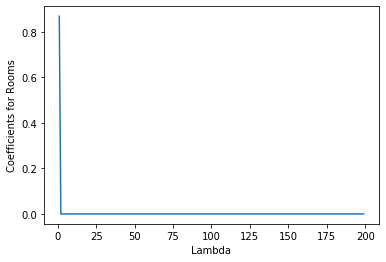

In [116]:
plt.plot(alpha, room)
plt.ylabel("Coefficients for Rooms")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

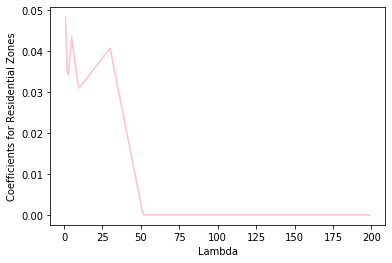

In [117]:
plt.plot(alpha,residential_zone,color='pink')
plt.ylabel("Coefficients for Residential Zones")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

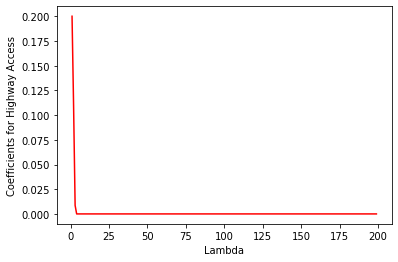

In [118]:
plt.plot(alpha,highway_access,color='red')
plt.ylabel("Coefficients for Highway Access")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

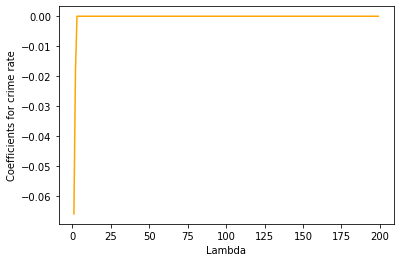

In [119]:
plt.plot(alpha,crime_rate,color='orange')
plt.ylabel("Coefficients for crime rate")
plt.xlabel("Lambda")

Text(0.5, 0, 'Lambda')

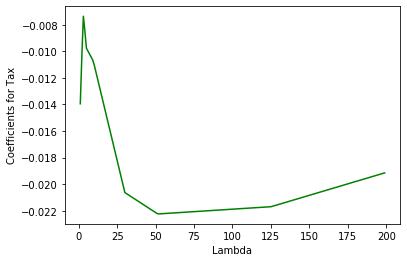

In [120]:
plt.plot(alpha,tax,color='green')
plt.ylabel("Coefficients for Tax")
plt.xlabel("Lambda")

# Task 4:

Text(0.5, 1.0, 'OLS')

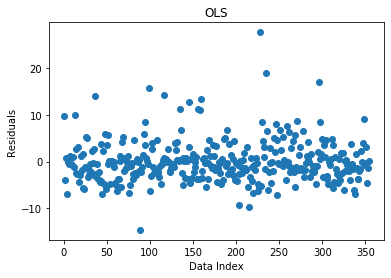

In [121]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(xtr,ytr)


ypr_tr = reg.predict(xtr)

res=[]
res= ytr - ypr_tr

index=[]
for i in range(1,355):
    index.append(i)
    
plt.scatter(index, res)
plt.xlabel("Data Index")
plt.ylabel("Residuals")
plt.title("OLS")

Text(0, 0.5, 'Residuals')

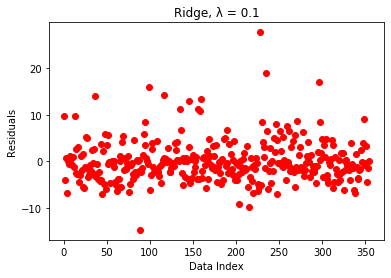

In [136]:
reg=linear_model.Ridge(alpha=0.1)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='red')
plt.title("Ridge, λ = 0.1")
plt.xlabel("Data Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

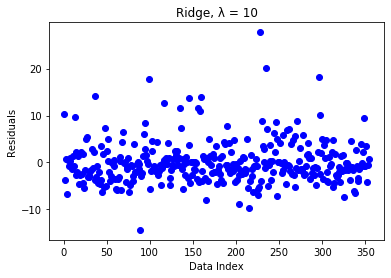

In [123]:
reg=linear_model.Ridge(alpha=10)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='blue')
plt.title("Ridge, λ = 10")
plt.xlabel("Data Index")
plt.ylabel("Residuals")


Text(0, 0.5, 'Residuals')

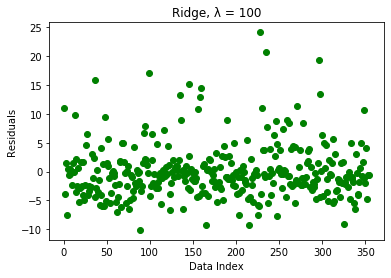

In [124]:
reg=linear_model.Ridge(alpha=100)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='green')
plt.title("Ridge, λ = 100")
plt.xlabel("Data Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

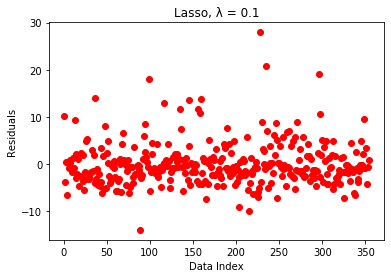

In [137]:
reg=linear_model.Lasso(alpha=0.1)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='red')
plt.title("Lasso, λ = 0.1")
plt.xlabel("Data Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

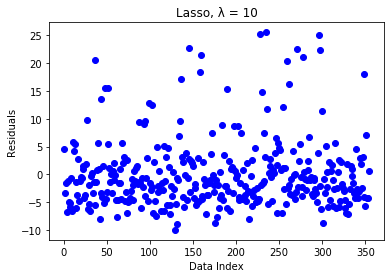

In [126]:
reg=linear_model.Lasso(alpha=10)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='blue')
plt.title("Lasso, λ = 10")
plt.xlabel("Data Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

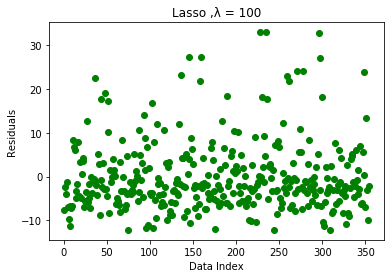

In [127]:
reg=linear_model.Lasso(alpha=100)
reg.fit(xtr,ytr)
ypr_tr=reg.predict(xtr)

res=[]
res=ytr-ypr_tr

index=[]
for i in range(1,355):
  index.append(i)


plt.scatter(index,res,color='green')
plt.title("Lasso ,λ = 100")
plt.xlabel("Data Index")
plt.ylabel("Residuals")

# Task 5:

In [133]:
rid= linear_model.Ridge(alpha=1)
lasso= linear_model.Lasso(alpha=1)
labels=['PRICE']
final=[]
ls=[]
X = df.drop(columns=labels)
y = df['PRICE']
limit=5
training_errors=[[],[],[]]
testing_errors=[[],[],[]]
for p in range(1,limit+1):
    kf=KFold(n_splits=3,random_state=p,shuffle=True)
    kf.get_n_splits(X)
    # X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    RMSE_train=[[],[],[]]
    RMSE_test=[[],[],[]]
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y[i], y[j]
        #normal regression
        OLS = reg.fit(X_train, y_train)
        RMSE_test[0].append(mean_squared_error(y_test,OLS.predict(X_test)))
        RMSE_train[0].append(mean_squared_error(y_train,OLS.predict(X_train)))
        #ridge regression
        OLS_Ridge = rid.fit(X_train, y_train)
        RMSE_test[1].append(mean_squared_error(y_test,OLS_Ridge.predict(X_test)))
        RMSE_train[1].append(mean_squared_error(y_train,OLS_Ridge.predict(X_train)))
        #lasso regression
        OLS_Lasso = lasso.fit(X_train, y_train)
        RMSE_test[2].append(mean_squared_error(y_test,OLS_Lasso.predict(X_test)))
        RMSE_train[2].append(mean_squared_error(y_train,OLS_Lasso.predict(X_train)))
    for i in range(3):
        training_errors[i].append(np.mean(RMSE_train[i]))
        testing_errors[i].append(np.mean(RMSE_test[i]))
train_e=[np.mean(training_errors[i]) for i in range(3)]
test_e=[np.mean(testing_errors[i]) for i in range(3)]
label=["OLS","Ridge(1)","Lasso(1)"]
out=pd.DataFrame({'Regression_Type':label,'Training_error':train_e,'Test_error':test_e},index=None)
out

,Regression_Type,Training_error,Test_error
0,OLS,65.271815,66.246352
1,Ridge(1),21.744247,24.156750
2,Lasso(1),26.506363,28.978511
